In [547]:
import pandas as pd
import matplotlib.pyplot as plt

In [548]:
#import dirty data
df = pd.read_csv('welcome.csv', encoding='latin1')
df.columns = ['PMID', 'Publisher', 'Journal title', 'Article title', 'Cost']
df.head()

,PMID,Publisher,Journal title,Article title,Cost
0,NaN,CUP,Psychological Medicine,Reduced parahippocampal cortical thickness in ...,£0.00
1,PMC3679557,ACS,Biomacromolecules,Structural characterization of a Model Gram-ne...,£2381.04
2,23043264 PMC3506128,ACS,J Med Chem,"Fumaroylamino-4,5-epoxymorphinans and related ...",£642.56
3,23438330 PMC3646402,ACS,J Med Chem,Orvinols with mixed kappa/mu opioid receptor a...,£669.64
4,23438216 PMC3601604,ACS,J Org Chem,Regioselective opening of myo-inositol orthoes...,£685.88


## Identify five most common journals and number of articles for each. 

In [549]:
#Group by journal and count.  View data and identify initial issues.
df.groupby(['Journal title']).count().sort_values('Publisher', ascending=False).head()

,PMID,Publisher,Article title,Cost
Journal title,,,,
PLoS One,91,92,92,92
PLoS ONE,62,62,62,62
Journal of Biological Chemistry,47,48,48,48
Nucleic Acids Research,20,21,21,21
Proceedings of the National Academy of Sciences,19,19,19,19


In [550]:
#Objective: change journal titles to lowercase 

#Use lambda function to make all lowercase and reassign to column to "save" changes to df
df['Journal title'] = df['Journal title'].apply(lambda x: str(x).lower())

#This also works the same as line 4 (uncomment one or the other).  Without reassigning to column, 
#the df defaults back to the raw data input.  
#df['Journal title'] = df['Journal title'].str.lower()

#Count and determine top 5 Journals.  Lines 12 and 15 are different methods of getting the same information.
#This line returns the values not in a df:
df['Journal title'].value_counts().head(5)

#To return as a df, use this code:
#df.groupby(['Journal title']).count().sort_values('Publisher', ascending=False).head(5)

plos one                           190
journal of biological chemistry     53
neuroimage                          29
plos genetics                       24
plos pathogens                      24
Name: Journal title, dtype: int64

In [551]:
#Remove unwanted characters from journal titles.
df['Journal title'] = df['Journal title'].apply(lambda x: str(x).replace(',', ''))
df['Journal title'] = df['Journal title'].apply(lambda x: str(x).replace(':', ''))
df['Journal title'] = df['Journal title'].apply(lambda x: str(x).replace('.', ''))

#Remove all whitespace.
df['Journal title'] = df['Journal title'].apply(lambda x: str(x).replace(' ', ''))

#Remove s from last word.
df['Journal title'] = df['Journal title'].apply(lambda x: str(x).rstrip('s'))

## Calculate mean, median, and std. dev of price for each journal.

In [552]:
#In order to run summary stats, cost must be numeric (float).  Test current status:
df[df['Cost'].apply(lambda x: str(x).isnumeric())]

#No results when running line 2 == all non-numeric values.

,PMID,Publisher,Journal title,Article title,Cost


In [553]:
#Looking at the raw data, we see the pound sterling sign as leading value.  Use slicing methods to cut out value [0]
#Run this cell only once or else it will continue to smash values.  Reassign to new column to save changes and 
#allow comparision with original.
df['Cost_mod'] = df['Cost'].apply(lambda x: x[1:])

In [554]:
#Look at df in this cell to confirm pound symbol has been removed and 2 decimal places remain in cost_mod column.
df.head(2)

,PMID,Publisher,Journal title,Article title,Cost,Cost_mod
0,NaN,CUP,psychologicalmedicine,Reduced parahippocampal cortical thickness in ...,£0.00,0.00
1,PMC3679557,ACS,biomacromolecule,Structural characterization of a Model Gram-ne...,£2381.04,2381.04


In [555]:
#Remove US dollar signs.  Find function will assign a -1 if symbol not found.  This is what we want, so select only 
#negative values.  Reassign to df to save changes.
df = df[df['Cost_mod'].apply(lambda x: str(x).find('$')) < 0]

In [556]:
#Convert cleaned cost column to float.  With all non numeric symbols removed, this will work without an error.
df['Cost_mod'] = df['Cost_mod'].astype(float)

In [557]:
#Confirm dtype successfully changed.
df.dtypes

PMID              object
Publisher         object
Journal title     object
Article title     object
Cost              object
Cost_mod         float64
dtype: object

In [558]:
df.groupby(['Journal title']).describe().head()

Cost_mod                                 \
                                 count      mean         std      min   
Journal title                                                           
academyofnutritionanddietetic      1.0  2379.540         NaN  2379.54   
acschemicalbiology                 5.0  1418.186  507.309560   947.07   
acschemicalneuroscience            1.0  1186.800         NaN  1186.80   
acsnano                            2.0   668.140   35.708892   642.89   
actacrystallographicasectiond      1.0   757.180         NaN   757.18   

                                                                     
                                    25%      50%       75%      max  
Journal title                                                        
academyofnutritionanddietetic  2379.540  2379.54  2379.540  2379.54  
acschemicalbiology             1267.760  1294.59  1294.780  2286.73  
acschemicalneuroscience        1186.800  1186.80  1186.800  1186.80  
acsnano                         655.515   668.14   680.765   693.39  
actacrystallographicasectiond   757.180   757.18   757.180   757.18

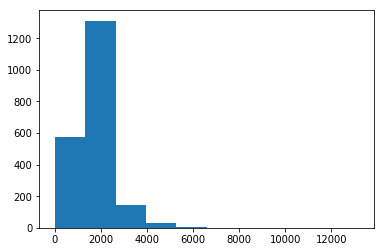

In [559]:
#Remove high cost values = 25000, presumably erroneous entries.
df = df[df['Cost_mod'] < 25000]

plt.hist(df['Cost_mod'], bins=10)
plt.show()

In [560]:
#Summary statistics for cost of each journal
df.groupby(['Journal title']).describe()

Cost_mod               \
                                                      count         mean   
Journal title                                                              
academyofnutritionanddietetic                           1.0  2379.540000   
acschemicalbiology                                      5.0  1418.186000   
acschemicalneuroscience                                 1.0  1186.800000   
acsnano                                                 2.0   668.140000   
actacrystallographicasectiond                           1.0   757.180000   
actacrystallographicasectiondbiologicalcrystall...      2.0   772.580000   
actacrystallographicasectionfstructuralbiologya...      2.0   796.635000   
actacrystallographyd                                    1.0   774.190000   
actad                                                   1.0   750.160000   
actadermatovenereologica                                1.0   653.960000   
actadiabetologica                                       1.0  2336.280000   
actaf                                                   1.0   754.900000   
actaneuropathol                                         1.0  1901.040000   
actaneuropathologica                                    3.0  2161.063333   
actaopthalmologica                                      1.0  2270.160000   
actaphysiol                                             1.0  1991.500000   
addiction                                               2.0  2136.225000   
advancesinexperimentalmedicineandbiology                4.0  1928.457500   
age                                                     2.0  2170.140000   
ageandageing                                            1.0  2040.000000   
ageing&society                                          1.0  1695.000000   
agingcell                                               1.0  1970.570000   
aid                                                     3.0  2059.306667   
aidsbehav                                               1.0  1834.770000   
aidscare                                                4.0  2294.225000   
aidsjournal                                             1.0  2015.720000   
aidsresearchandtherapy                                  1.0  1240.000000   
aidsuk                                                  2.0  1836.920000   
alcoholandalcoholism                                    1.0  2040.000000   
alimentrarypharmacology&therapeutic                     2.0  2373.590000   
...                                                     ...          ...   
ticksandtick-bornedisease                               1.0  2863.730000   
tissueengineeringparta                                  1.0  1741.320000   
traffic                                                 6.0  2129.338333   
transactionsoftheroyalsocietyoftropicalmedicine...      1.0  1524.080000   
translationalpsychiatry                                 2.0  2880.000000   
trendsincognitivescience                                1.0  2340.630000   
trendsingenetic                                         2.0  2370.935000   
trendsinmicrobiology                                    1.0  2291.330000   
trendsinmolecularmedicine                               1.0  2248.330000   
trendsinneuroscience                                    2.0  2414.885000   
trendsinparasitology                                    3.0  2257.653333   
trial                                                   4.0  1200.475000   
tropicalanimalhealth&production                         1.0  2054.780000   
tropicalmedicineandinternationalhealth                  6.0  1843.163333   
tropmedinthealth                                        1.0  1834.770000   
tuberculosi                                             2.0  2161.255000   
urbanhistory                                            1.0  2034.000000   
urolithiasi                                             1.0  1112.400000   
vaccine                                                 5.0  1623.394000   
vascularpharmacology   

## Bonus round: price by subject area.

In [624]:
#
df['Publisher'] = df['Publisher'].apply(lambda x: str(x).lower())
df['Article title'] = df['Article title'].apply(lambda x: str(x).lower())

#Classify based on key words.  Classifies in order listed.

df.loc[df['Journal title'].str.contains('bio'), 'subject'] = 'biology'
df.loc[df['Journal title'].str.contains('cell'), 'subject'] = 'biology'
df.loc[df['Publisher'].str.contains('cell'), 'subject'] = 'biology'

df.loc[df['Journal title'].str.contains('chem'), 'subject'] = 'chemistry'
df.loc[df['Publisher'].str.contains('chem'), 'subject'] = 'chemistry'

df.loc[df['Journal title'].str.contains('biochem'), 'subject'] = 'biochemistry'

df.loc[df['Journal title'].str.contains('psyc'), 'subject'] = 'psychology'
df.loc[df['Journal title'].str.contains('mental'), 'subject'] = 'psychology'
df.loc[df['Journal title'].str.contains('emotion'), 'subject'] = 'psychology'
df.loc[df['Journal title'].str.contains('depression'), 'subject'] = 'psychology'
df.loc[df['Journal title'].str.contains('sleep'), 'subject'] = 'psychology'

df.loc[df['Journal title'].str.contains('obesity'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('health'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('hiv'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('aid'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('immun'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('virol'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('bacter'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('patho'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('nutri'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('epidem'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('malaria'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('disease'), 'subject'] = 'health/disease'
df.loc[df['Journal title'].str.contains('paras'), 'subject'] = 'health/disease'
df.loc[df['Article title'].str.contains('vaccine'), 'subject'] = 'health/disease'
df.loc[df['Article title'].str.contains('immun'), 'subject'] = 'health/disease'

df.loc[df['Journal title'].str.contains('physio'), 'subject'] = 'physiology'

df.loc[df['Journal title'].str.contains('animal'), 'subject'] = 'veterinary'
df.loc[df['Journal title'].str.contains('veterinary'), 'subject'] = 'veterinary'

df.loc[df['Journal title'].str.contains('neuro'), 'subject'] = 'neuroscience'
df.loc[df['Journal title'].str.contains('brain'), 'subject'] = 'neuroscience'
df.loc[df['Journal title'].str.contains('epilep'), 'subject'] = 'neuroscience'

df.loc[df['Journal title'].str.contains('pharma'), 'subject'] = 'pharmacology'

df.loc[df['Journal title'].str.contains('hepato'), 'subject'] = 'medical'
df.loc[df['Journal title'].str.contains('transpl'), 'subject'] = 'medical'
df.loc[df['Journal title'].str.contains('respiratory'), 'subject'] = 'medical'
df.loc[df['Journal title'].str.contains('blood'), 'subject'] = 'medical'
df.loc[df['Journal title'].str.contains('genetic'), 'subject'] = 'medical'
df.loc[df['Journal title'].str.contains('vision'), 'subject'] = 'medical'
df.loc[df['Journal title'].str.contains('derma'), 'subject'] = 'medical'
df.loc[df['Journal title'].str.contains('derma'), 'subject'] = 'medical'
df.loc[df['Journal title'].str.contains('endo'), 'subject'] = 'medical'
df.loc[df['Publisher'].str.contains('med'), 'subject'] = 'medical'
df.loc[df['Publisher'].str.contains('physician'), 'subject'] = 'medical'

df.loc[df['Journal title'].str.contains('child'), 'subject'] = 'pediatrics'
df.loc[df['Journal title'].str.contains('pedia'), 'subject'] = 'pediatrics'

#Medical last to catch all that are crossovers into medical (ie biomedical)
df.loc[df['Journal title'].str.contains('med'), 'subject'] = 'medical'

#Fill unclassified with other and reassign column.
df['subject'] = df['subject'].fillna('other')

df[df['subject'] == 'other'].head(200)

,PMID,Publisher,Journal title,Article title,Cost,Cost_mod,subject
6,PMC3709265,acs,journalofproteomeresearch,mapping proteolytic processing in the secretom...,£2367.95,2367.95,other
7,23057412 PMC3495574,acs,molpharm,quantitative silencing of egfp reporter gene b...,£649.33,649.33,other
15,PMC3572711,aga institute,gastroenterology,much of the genetic risk of colorectal cancer ...,£238.08,238.08,other
114,NaN,american speech-language-hearing association,speechlanguageandhearingresearch,developmental trajectories of verbal and nonve...,£1969.02,1969.02,other
250,PMC3021913,bioscientifica,reproduction(cambridgeengland),influence of energy balance on the somatotroph...,£1200.00,1200.00,other
252,NaN,bmc,arthritisresearchandtherapy,myeloid related protein induces muscle derived...,£1315.80,1315.80,other
266,PMC3348006,bmc,costeffectivenessandresourceallocation,cost and cost effectiveness of long-lasting in...,£1302.00,1302.00,other
274,PMC3686680,bmc,trial,the impact of a novel molecular tb diagnostic ...,£1130.40,1130.40,other
275,PMC3495012,bmc,trial,lovastatin for adult patients with dengue: pro...,£1156.50,1156.50,other
276,PMC3041663,bmc,trial,cluster randomised trial in the general practi...,£1350.00,1350.00,other


In [625]:
df.groupby(['subject']).describe()

Cost_mod                                               \
                  count         mean         std      min        25%   
subject                                                                
biochemistry       36.0  1860.121111  457.241056   270.00  1800.0000   
biology           219.0  2085.526530  920.902088   321.46  1548.5950   
chemistry         109.0  1557.183853  586.875065   265.67  1188.3900   
health/disease    291.0  1910.233883  610.945285    45.94  1527.2700   
medical           352.0  1723.045227  607.905448     0.00  1294.0500   
neuroscience      206.0  2066.692767  714.479286   480.93  1735.0325   
other             721.0  1654.206976  931.421792   122.31   896.9900   
pediatrics         20.0  2090.999500  303.648704  1280.00  1855.9425   
pharmacology       28.0  2253.132143  530.088773  1063.31  1944.1800   
physiology         16.0  1809.164375  505.490908   827.13  1340.5300   
psychology         58.0  2586.619310  782.952555   364.17  2321.3800   
veterinary          9.0  2297.587778  420.951861  1806.38  2040.0000   

                                               
                     50%        75%       max  
subject                                        
biochemistry    1825.575  2100.0000   2488.17  
biology         1956.000  2368.7750   4226.04  
chemistry       1443.990  1743.8400   3906.43  
health/disease  1899.660  2275.7750   4554.01  
medical         1808.555  2100.0000   3938.82  
neuroscience    2065.785  2400.0000   5760.00  
other           1528.170  2250.0000  13200.00  
pediatrics      2183.910  2290.1725   2645.85  
pharmacology    2316.640  2438.3700   3000.00  
physiology      1943.220  2155.6975   2400.00  
psychology      2432.275  3000.0000   4099.71  
veterinary      2400.000  2476.8500   3144.24

In [626]:
#lots of work could still be done to reduce "other" classification.  Is there a more efficient way to do it than above?